# USGS NWIS data retrieval

Common parameters used by NWIS:

- site id: describe a station id
- parameter code ([full list](https://help.waterdata.usgs.gov/code/parameter_cd_query?fmt=rdb&inline=true&group_cd=%))

    - common codes
    
|code|name|$unit$|
|:----:|:----:|:----:|
|00010|Temperature, water|$deg C$|
|00060|discharge, |$ft^3/s$|
|00065|gage height, |$ft$|
|00095|Specific conductance, water, unfiltered|$uS/cm @25C$|
|00300| Dissolved oxygen|$mg/L$|
|00301|Diss oxygen| %saturtn|
|00400| pH| |
|00618|nitrate, filtered (dissovled), water, |$mg/L$|
|00620|nitrate, unfiltered (total), water, |$mg/L$|
|00681|DOC|$mg/L$|
|63680| Turbidity | Form Neph|
|72019|depth to water level| ft|
|99133| NO3+NO2 water,insitu|$mg/L$|

- statistic code ([full list](https://help.waterdata.usgs.gov/code/stat_cd_nm_query?stat_nm_cd=%25&fmt=html))

    - common codes
    
code|name
:---:|:---:
00001|maximum
00002|minimum
00003|mean

In [1]:
%matplotlib inline
# %matplotlib qt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [2]:
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# USGS dataretrieval package (Python version)

[Github](https://github.com/USGS-python/dataretrieval)

Available service:

- instantaneous values (`iv`)
- daily values (`dv`)
- statistics (`stat`)
- site info (`site`)
- discharge peaks (`peaks`)
- discharge measurements (`measurements`)
- water quality samples (`qwdata`)
- depth to gw levels (`gwlevels`)

Notes:

- Most complete functions (may not be as good as the R-dataretrival functions)
- Can download streamflow, water quality, gw levels ...

In [4]:
import dataretrieval.nwis as nwis

In [5]:
para_codes = {'temperature':'00010', 'discharge':'00060', 'SpC':'00095'}

In [6]:
site_id = ['01436000'] # stream gage in neversink wateshed, Delaware
start_date = '2014-10-01'

## instantaneous values (iv)

In [7]:
df = nwis.get_record(sites=site_id, service='iv', start=start_date, parameterCd= para_codes['discharge'])

In [8]:
df.head()

,00060,00060_cd,site_no
datetime,,,
2014-10-01 00:00:00-05:00,88.7,A,01436000
2014-10-01 00:15:00-05:00,88.7,A,01436000
2014-10-01 00:30:00-05:00,88.7,A,01436000
2014-10-01 00:45:00-05:00,88.7,A,01436000
2014-10-01 01:00:00-05:00,88.7,A,01436000


Rename column and remove weird values

In [9]:
df.rename(columns={'00060':'discharge [ft^3/s]'}, inplace = True)

df[df['discharge [ft^3/s]'] < 0 ] = np.nan

df = df[df.index.notnull()]

df.loc[:, 'discharge [m^3/d]'] = df.loc[:, 'discharge [ft^3/s]'] * 2446.58 # convert from ft3/s to m3/d

In [10]:
df.head()

,discharge [ft^3/s],00060_cd,site_no,discharge [m^3/d]
datetime,,,,
2014-10-01 00:00:00-05:00,88.7,A,01436000,217011.646
2014-10-01 00:15:00-05:00,88.7,A,01436000,217011.646
2014-10-01 00:30:00-05:00,88.7,A,01436000,217011.646
2014-10-01 00:45:00-05:00,88.7,A,01436000,217011.646
2014-10-01 01:00:00-05:00,88.7,A,01436000,217011.646


Text(0, 0.5, 'Discharge [$m^3/d$]')

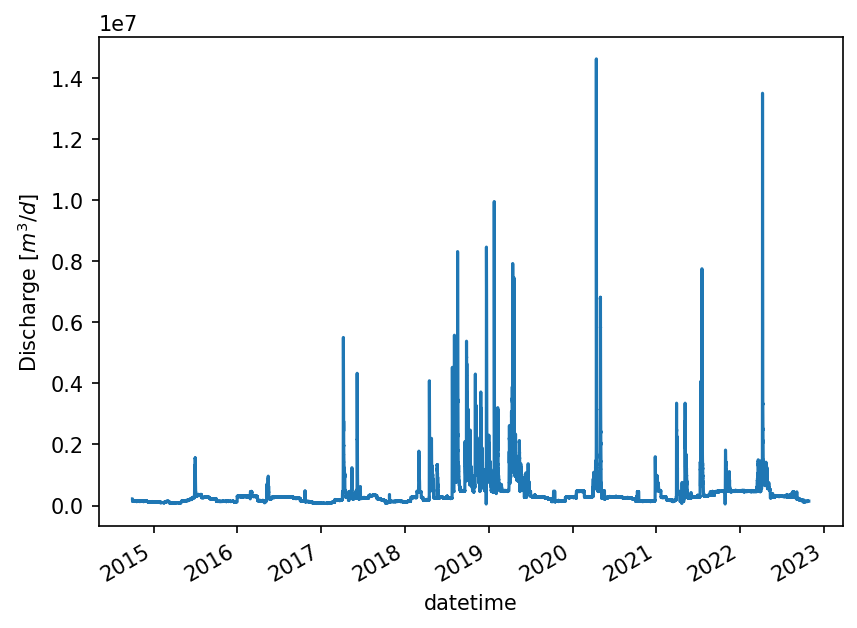

In [11]:
df['discharge [m^3/d]'].plot()
plt.ylabel("Discharge [$m^3/d$]")

In [12]:
df.to_csv(f"Discharge_USGS{site_id}.csv")

## daily values (dv)

In [13]:
df_dv = nwis.get_record(sites=site_id, service='dv', start=start_date, parameterCd= para_codes['temperature'])

In [14]:
df_dv.head()

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd
datetime,,,,,,,
2019-07-13 00:00:00+00:00,10.9,A,01436000,7.2,A,8.7,A
2019-07-14 00:00:00+00:00,10.3,A,01436000,7.4,A,8.6,A
2019-07-15 00:00:00+00:00,10.5,A,01436000,7.5,A,8.7,A
2019-07-16 00:00:00+00:00,10.4,A,01436000,7.4,A,8.5,A
2019-07-17 00:00:00+00:00,10.0,A,01436000,6.3,A,8.0,A


In [15]:
df_dv.rename(columns={'00010_Mean':'T_mean [degC]'}, inplace = True)
# df_dv[df_dv['discharge [ft^3/s]'] < 0 ] = np.nan
# df_dv = df_dv[df_dv.index.notnull()]

<AxesSubplot:xlabel='datetime'>

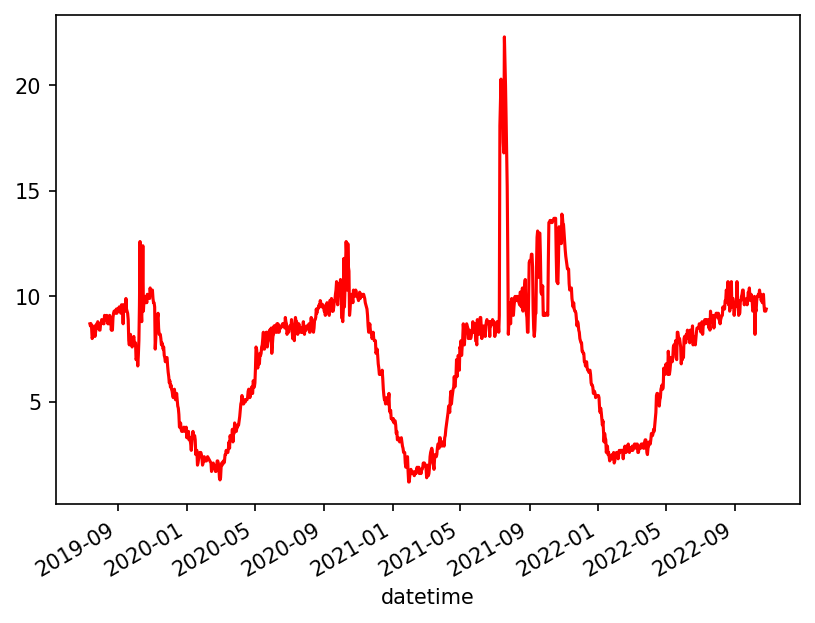

In [16]:
df_dv['T_mean [degC]'].plot(color = 'r')

## GW level

In [7]:
site_id = ['414501111520001'] # gw well in Utah
# site_id = ['414236112101201'] # gw well in Utah

In [8]:
df = nwis.get_record(sites=site_id, service='gwlevels', start= '1980-01-01', end='2022-10-01')

/Users/shuai/opt/anaconda3/envs/geo/lib/python3.10/site-packages/dataretrieval/utils.py:86: UserWarning: Warning: 486 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(


In [9]:
df

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
datetime,,,,,,,,,,,,,,,,
1990-03-01 00:35:00+00:00,USGS,414501111520001,GW,1990-03-01,00:35,+0000,-13.00,NaN,NaN,1,USGS,m,NaN,S,M,A
1990-04-27 13:30:00+00:00,USGS,414501111520001,GW,1990-04-27,13:30,+0000,-13.00,NaN,NaN,1,USGS,m,NaN,S,M,A
1990-05-29 18:07:00+00:00,USGS,414501111520001,GW,1990-05-29,18:07,+0000,-13.00,NaN,NaN,1,USGS,m,NaN,S,M,A
1990-06-29 13:55:00+00:00,USGS,414501111520001,GW,1990-06-29,13:55,+0000,-12.40,NaN,NaN,1,USGS,m,NaN,S,G,A
1990-07-25 22:39:00+00:00,USGS,414501111520001,GW,1990-07-25,22:39,+0000,-12.20,NaN,NaN,1,USGS,m,NaN,S,G,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,USGS,414501111520001,GW,2006-06-28,NaN,+0000,-15.75,NaN,NaN,1,USGS,D,NaN,S,H,A
NaT,USGS,414501111520001,GW,2007-12-11,NaN,+0000,-16.80,NaN,NaN,1,USGS,D,NaN,S,H,A
NaT,USGS,414501111520001,GW,2008-01-15,NaN,+0000,-15.95,NaN,NaN,1,USGS,D,NaN,S,H,A


<AxesSubplot:xlabel='datetime'>

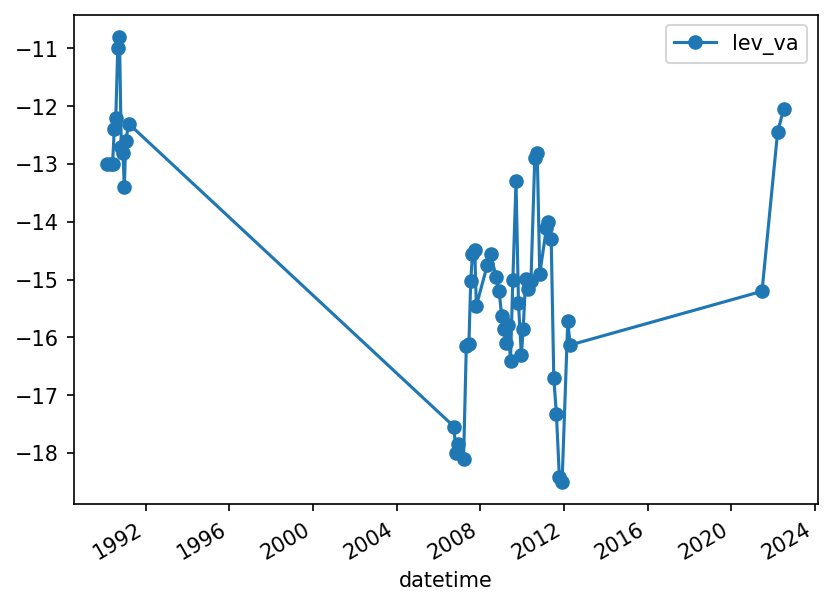

In [10]:
df[['lev_va']].plot(marker='o')

Need to use `datetime_index=False` since some timestamps are missing in the groundwater data. By default, the returned dataframe will coerce any missing timestamp into `NaT`. As a result, the default plot above shows less data points.

In [11]:
df = nwis.get_record(sites=site_id, service='gwlevels', start= '1980-01-01', end='2022-10-01', datetime_index=False)

In [12]:
df

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
0,USGS,414501111520001,GW,1980-01-05,NaN,UTC,-19.20,NaN,NaN,1,USGS,D,NaN,S,B,A
1,USGS,414501111520001,GW,1980-01-10,NaN,UTC,-19.00,NaN,NaN,1,USGS,D,NaN,S,B,A
2,USGS,414501111520001,GW,1980-01-15,NaN,UTC,-19.00,NaN,NaN,1,USGS,D,NaN,S,B,A
3,USGS,414501111520001,GW,1980-01-20,NaN,UTC,-18.90,NaN,NaN,1,USGS,D,NaN,S,B,A
4,USGS,414501111520001,GW,1980-01-25,NaN,UTC,-19.20,NaN,NaN,1,USGS,D,NaN,S,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,USGS,414501111520001,GW,2012-03-07,23:04,UTC,-15.72,NaN,NaN,1,USGS,m,NaN,S,H,A
536,USGS,414501111520001,GW,2012-04-18,21:24,UTC,-16.13,NaN,NaN,1,USGS,m,NaN,S,H,A
537,USGS,414501111520001,GW,2021-06-22,21:40,UTC,-15.20,NaN,NaN,1,USGS,m,NaN,S,H,A
538,USGS,414501111520001,GW,2022-03-21,21:24,UTC,-12.45,NaN,NaN,1,USGS,m,NaN,S,H,A


Set date as the new index. This may work fine for groundwater data since the measuring frequency is usually > 1 d. Another option is to assign all missing timestamp with `00:00:00 UTC`.

In [13]:
df['date'] = pd.to_datetime(df['lev_dt'])
df.set_index('date', inplace=True)

In [14]:
df

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
date,,,,,,,,,,,,,,,,
1980-01-05,USGS,414501111520001,GW,1980-01-05,NaN,UTC,-19.20,NaN,NaN,1,USGS,D,NaN,S,B,A
1980-01-10,USGS,414501111520001,GW,1980-01-10,NaN,UTC,-19.00,NaN,NaN,1,USGS,D,NaN,S,B,A
1980-01-15,USGS,414501111520001,GW,1980-01-15,NaN,UTC,-19.00,NaN,NaN,1,USGS,D,NaN,S,B,A
1980-01-20,USGS,414501111520001,GW,1980-01-20,NaN,UTC,-18.90,NaN,NaN,1,USGS,D,NaN,S,B,A
1980-01-25,USGS,414501111520001,GW,1980-01-25,NaN,UTC,-19.20,NaN,NaN,1,USGS,D,NaN,S,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-07,USGS,414501111520001,GW,2012-03-07,23:04,UTC,-15.72,NaN,NaN,1,USGS,m,NaN,S,H,A
2012-04-18,USGS,414501111520001,GW,2012-04-18,21:24,UTC,-16.13,NaN,NaN,1,USGS,m,NaN,S,H,A
2021-06-22,USGS,414501111520001,GW,2021-06-22,21:40,UTC,-15.20,NaN,NaN,1,USGS,m,NaN,S,H,A


<AxesSubplot:xlabel='date'>

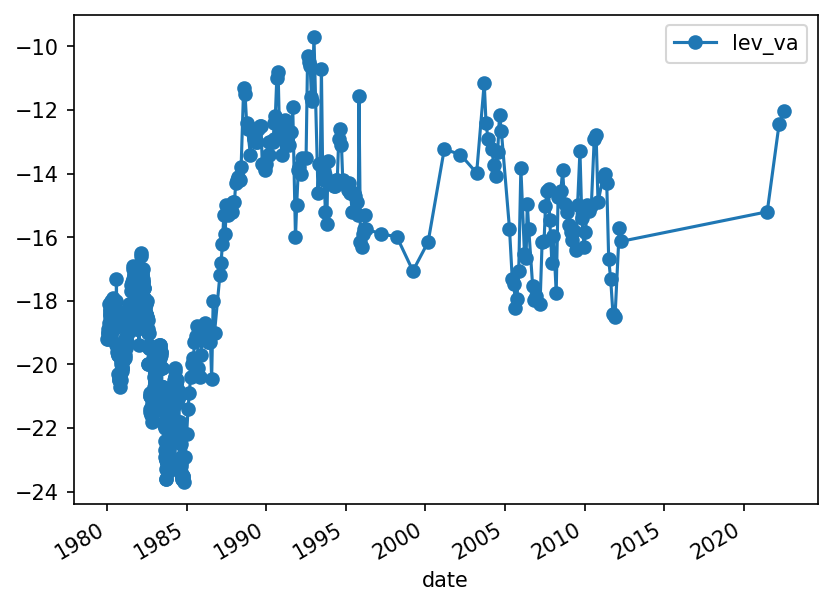

In [15]:
df[['lev_va']].plot(marker='o')

In [21]:
df.to_csv(f'well_{site_id[0]}.csv')

### Batch download wells

Given a list of well ids, plot and download all well data at once. First, we create a function for downloading and plotting a single well. Then use the same function for all other wells.

In [16]:
site_ids = ['414501111520001', '414642111511401']

In [17]:
df = nwis.get_record(sites=site_ids, service='gwlevels', start= '1900-01-01', datetime_index=False)

In [18]:
df

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
0,USGS,414501111520001,GW,1940-08-25,NaN,UTC,-14.80,NaN,NaN,1,USGS,D,NaN,S,B,A
1,USGS,414501111520001,GW,1940-08-31,NaN,UTC,-14.50,NaN,NaN,1,USGS,D,NaN,S,B,A
2,USGS,414501111520001,GW,1940-09-05,NaN,UTC,-14.70,NaN,NaN,1,USGS,D,NaN,S,B,A
3,USGS,414501111520001,GW,1940-09-10,NaN,UTC,-14.70,NaN,NaN,1,USGS,D,NaN,S,B,A
4,USGS,414501111520001,GW,1940-09-15,NaN,UTC,-14.40,NaN,NaN,1,USGS,D,NaN,S,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,USGS,414642111511401,GW,2020-07-07,18:17,UTC,-13.21,NaN,NaN,1,USGS,m,NaN,S,H,A
3088,USGS,414642111511401,GW,2021-03-11,19:38,UTC,-13.80,NaN,NaN,1,USGS,m,NaN,S,H,A
3089,USGS,414642111511401,GW,2021-06-22,17:59,UTC,-12.91,NaN,NaN,1,USGS,m,NaN,S,H,A
3090,USGS,414642111511401,GW,2022-03-23,21:04,UTC,-13.22,NaN,NaN,1,USGS,m,NaN,S,H,A


In [19]:
df['date'] = pd.to_datetime(df['lev_dt'])
df.set_index('date', inplace=True)

In [20]:
df

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
date,,,,,,,,,,,,,,,,
1940-08-25,USGS,414501111520001,GW,1940-08-25,NaN,UTC,-14.80,NaN,NaN,1,USGS,D,NaN,S,B,A
1940-08-31,USGS,414501111520001,GW,1940-08-31,NaN,UTC,-14.50,NaN,NaN,1,USGS,D,NaN,S,B,A
1940-09-05,USGS,414501111520001,GW,1940-09-05,NaN,UTC,-14.70,NaN,NaN,1,USGS,D,NaN,S,B,A
1940-09-10,USGS,414501111520001,GW,1940-09-10,NaN,UTC,-14.70,NaN,NaN,1,USGS,D,NaN,S,B,A
1940-09-15,USGS,414501111520001,GW,1940-09-15,NaN,UTC,-14.40,NaN,NaN,1,USGS,D,NaN,S,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07,USGS,414642111511401,GW,2020-07-07,18:17,UTC,-13.21,NaN,NaN,1,USGS,m,NaN,S,H,A
2021-03-11,USGS,414642111511401,GW,2021-03-11,19:38,UTC,-13.80,NaN,NaN,1,USGS,m,NaN,S,H,A
2021-06-22,USGS,414642111511401,GW,2021-06-22,17:59,UTC,-12.91,NaN,NaN,1,USGS,m,NaN,S,H,A


site_no
414501111520001    AxesSubplot(0.125,0.2;0.775x0.68)
414642111511401    AxesSubplot(0.125,0.2;0.775x0.68)
Name: lev_va, dtype: object

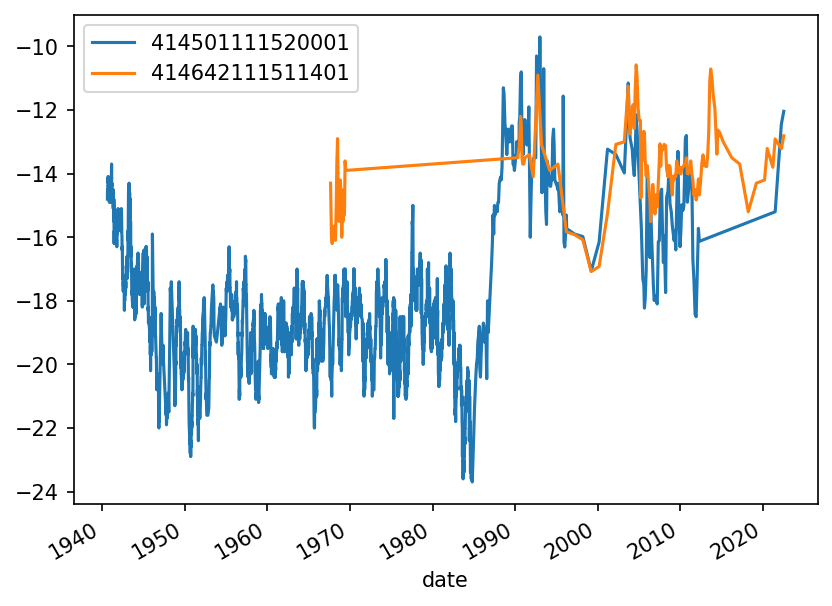

In [26]:
df.groupby('site_no')['lev_va'].plot(legend=True)

In [28]:
isite = '414642111511401'
idf = df[df['site_no'] == isite]

In [29]:
idf

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
date,,,,,,,,,,,,,,,,
1967-08-29,USGS,414642111511401,GW,1967-08-29,NaN,UTC,-14.30,NaN,NaN,1,USGS,D,NaN,S,M,A
1967-10-08,USGS,414642111511401,GW,1967-10-08,NaN,UTC,-15.95,NaN,NaN,1,USGS,D,NaN,S,M,A
1967-11-08,USGS,414642111511401,GW,1967-11-08,NaN,UTC,-16.20,NaN,NaN,1,USGS,D,NaN,S,M,A
1967-12-06,USGS,414642111511401,GW,1967-12-06,NaN,UTC,-15.85,NaN,NaN,1,USGS,D,NaN,S,M,A
1968-01-17,USGS,414642111511401,GW,1968-01-17,NaN,UTC,-15.90,NaN,NaN,1,USGS,D,NaN,S,M,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07,USGS,414642111511401,GW,2020-07-07,18:17,UTC,-13.21,NaN,NaN,1,USGS,m,NaN,S,H,A
2021-03-11,USGS,414642111511401,GW,2021-03-11,19:38,UTC,-13.80,NaN,NaN,1,USGS,m,NaN,S,H,A
2021-06-22,USGS,414642111511401,GW,2021-06-22,17:59,UTC,-12.91,NaN,NaN,1,USGS,m,NaN,S,H,A


In [30]:
df = nwis.get_record(sites=site_ids, service='gwlevels', start= '1900-01-01', datetime_index=True)

/Users/shuai/opt/anaconda3/envs/geo/lib/python3.10/site-packages/dataretrieval/utils.py:86: UserWarning: Warning: 2960 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(


In [31]:
df

agency_cd site_tp_cd      lev_dt  \
site_no         datetime                                                     
414501111520001 1990-03-01 00:35:00+00:00      USGS         GW  1990-03-01   
                1990-04-27 13:30:00+00:00      USGS         GW  1990-04-27   
                1990-05-29 18:07:00+00:00      USGS         GW  1990-05-29   
                1990-06-29 13:55:00+00:00      USGS         GW  1990-06-29   
                1990-07-25 22:39:00+00:00      USGS         GW  1990-07-25   
...                                             ...        ...         ...   
414642111511401 NaN                            USGS         GW  2006-08-30   
                NaN                            USGS         GW  2007-12-11   
                NaN                            USGS         GW  2008-01-15   
                NaN                            USGS         GW  2008-03-19   
                NaN                            USGS         GW  2008-08-14   

                                          lev_tm lev_tz_cd  lev_va  sl_lev_va  \
site_no         datetime                                                        
414501111520001 1990-03-01 00:35:00+00:00  00:35     +0000  -13.00        NaN   
                1990-04-27 13:30:00+00:00  13:30     +0000  -13.00        NaN   
                1990-05-29 18:07:00+00:00  18:07     +0000  -13.00        NaN   
                1990-06-29 13:55:00+00:00  13:55     +0000  -12.40        NaN   
                1990-07-25 22:39:00+00:00  22:39     +0000  -12.20        NaN   
...                                          ...       ...     ...        ...   
414642111511401 NaN                          NaN     +0000  -14.34        NaN   
                NaN                          NaN     +0000  -13.18        NaN   
                NaN                          NaN     +0000  -13.08        NaN   
                NaN                          NaN     +0000  -13.12        NaN   
                NaN                          NaN     +0000  -13.74        NaN   

                                           sl_datum_cd  lev_status_cd  \
site_no         datetime                                                
414501111520001 1990-03-01 00:35:00+00:00          NaN              1   
                1990-04-27 13:30:00+00:00          NaN              1   
                1990-05-29 18:07:00+00:00          NaN              1   
                1990-06-29 13:55:00+00:00          NaN              1   
                1990-07-25 22:39:00+00:00          NaN              1   
...                                                ...            ...   
414642111511401 NaN                                NaN              1   
                NaN                                NaN              1   
                NaN                                NaN              1   
                NaN                                NaN              1   
                NaN                                NaN              1   

                                          lev_agency_cd lev_dt_acy_cd  \
site_no         datetime                                                
414501111520001 1990-03-01 00:35:00+00:00          USGS             m   
                1990-04-27 13:30:00+00:00          USGS             m   
                1990-05-29 18:07:00+00:00          USGS             m   
                1990-06-29 13:55:00+00:00          USGS             m   
                1990-07-25 22:39:00+00:00          USGS             m   
...                                                 ...           ...   
414642111511401 NaN                                USGS             D   
                NaN                                USGS             D   
                NaN                                USGS             D   
                NaN                                USGS             D   
                NaN                                USGS             D   

                                           lev_acy_cd lev_src_cd lev_meth

In [32]:
df.loc['414501111520001']

,agency_cd,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
datetime,,,,,,,,,,,,,,,
1990-03-01 00:35:00+00:00,USGS,GW,1990-03-01,00:35,+0000,-13.00,NaN,NaN,1,USGS,m,NaN,S,M,A
1990-04-27 13:30:00+00:00,USGS,GW,1990-04-27,13:30,+0000,-13.00,NaN,NaN,1,USGS,m,NaN,S,M,A
1990-05-29 18:07:00+00:00,USGS,GW,1990-05-29,18:07,+0000,-13.00,NaN,NaN,1,USGS,m,NaN,S,M,A
1990-06-29 13:55:00+00:00,USGS,GW,1990-06-29,13:55,+0000,-12.40,NaN,NaN,1,USGS,m,NaN,S,G,A
1990-07-25 22:39:00+00:00,USGS,GW,1990-07-25,22:39,+0000,-12.20,NaN,NaN,1,USGS,m,NaN,S,G,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,USGS,GW,2006-06-28,NaN,+0000,-15.75,NaN,NaN,1,USGS,D,NaN,S,H,A
NaT,USGS,GW,2007-12-11,NaN,+0000,-16.80,NaN,NaN,1,USGS,D,NaN,S,H,A
NaT,USGS,GW,2008-01-15,NaN,+0000,-15.95,NaN,NaN,1,USGS,D,NaN,S,H,A


## water quality

In [22]:
df_qw = nwis.get_record(sites=site_id, service='qwdata', start= start_date)

## Site info

get basic info about the site

In [23]:
df = nwis.get_record(sites=site_id, service='site')
df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,414501111520001,(A-12- 1)29cab- 1,GW,414501,1115200,41.750208,-111.867445,M,S,...,Y,C,YYYNNYYN,NaN,111ALVM,C,43.0,NaN,S,464920300


## query by region

**state region**

In [24]:
df = nwis.get_info(stateCd = "WA", parameterCd= para_codes['discharge'])
df[0].head()

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,12009500,"BEAR BRANCH NEAR NASELLE, WA",ST,461948.0,1235437.0,46.329825,-123.911540,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,12010000,"NASELLE RIVER NEAR NASELLE, WA",ST,462227.0,1234432.0,46.373994,-123.743482,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,12010500,"SALMON CREEK NEAR NASELLE, WA",ST,462120.0,1234500.0,46.355383,-123.751259,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,12010700,"SOUTH FORK NASELLE RIVER NEAR NASELLE, WA",ST,462039.0,1234823.0,46.343993,-123.807649,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,12011000,"NORTH NEMAH RIVER NEAR SOUTH BEND, WA",ST,462930.0,1235000.0,46.491490,-123.834602,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**box region**

In [25]:
df = nwis.get_info(bBox = [-76.6,38.3,-74.0,42.6], parameterCd= para_codes['discharge'])
df[0].head()

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,01349541,SUGARLOAF BROOK SOUTH OF TANNERSVILLE NY,ST,420842.0,740723.0,42.145000,-74.123056,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,01349700,EAST KILL NEAR JEWETT CENTER NY,ST,421457.0,741810.0,42.249167,-74.302778,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,01349705,SCHOHARIE CREEK NEAR LEXINGTON NY,ST,421413.0,742025.0,42.236944,-74.340278,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,01349711,WEST KILL BELOW HUNTER BROOK NEAR SPRUCETON NY,ST,421106.0,741637.0,42.185000,-74.276944,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,01349810,WEST KILL NEAR WEST KILL NY,ST,421349.0,742335.0,42.230278,-74.393056,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**huc region**

In [26]:
huc = '02040104' # only HUC8 or higher is supported?

df = nwis.get_info(huc = huc, parameterCd= para_codes['discharge'])[0]
df.head()

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,01432110,"Lackawaxen River at Rowland, PA",ST,412833.0,750212.0,41.475923,-75.036281,M,U,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,01432150,BEAVER BROOK NEAR BARRYVILLE NY,ST,412855.0,745703.0,41.482034,-74.950445,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,01432160,DELAWARE RIVER AT BARRYVILLE NY,ST,412831.0,745446.0,41.475368,-74.912389,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,01432495,"Shohola Creek near Walker Lake, PA",ST,412700.0,745518.0,41.450000,-74.921667,M,S,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,01432600,"Twin Lakes Creek near Shohola, PA",ST,412605.0,745320.0,41.434813,-74.888500,M,U,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.drop_duplicates(subset=['dec_lat_va', 'dec_long_va'], inplace = True)

In [28]:
df.head()

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,01432110,"Lackawaxen River at Rowland, PA",ST,412833.0,750212.0,41.475923,-75.036281,M,U,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,01432150,BEAVER BROOK NEAR BARRYVILLE NY,ST,412855.0,745703.0,41.482034,-74.950445,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,01432160,DELAWARE RIVER AT BARRYVILLE NY,ST,412831.0,745446.0,41.475368,-74.912389,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,01432495,"Shohola Creek near Walker Lake, PA",ST,412700.0,745518.0,41.450000,-74.921667,M,S,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,01432600,"Twin Lakes Creek near Shohola, PA",ST,412605.0,745320.0,41.434813,-74.888500,M,U,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Use hydrofunctions

[Documentation](https://hydrofunctions.readthedocs.io/en/latest/), [Github](https://github.com/mroberge/hydrofunctions)

Notes: 

- Only supports streamflow download
- Only 'iv' and 'dv' services are included

In [29]:
import hydrofunctions as hf

In [30]:
site_id = '01436000'
# site_id = '09111250'
start_date = '2014-10-01'

In [31]:
herring = hf.NWIS(site_id, 'iv', start_date= start_date)

Requested data from https://nwis.waterservices.usgs.gov/nwis/iv/?format=json%2C1.1&sites=01436000&startDT=2014-10-01


In [32]:
herring

USGS:01436000: NEVERSINK RIVER AT NEVERSINK NY
    00010: <15 * Minutes>  Temperature, water, degrees Celsius 
    00060: <15 * Minutes>  Discharge, cubic feet per second 
    00065: <15 * Minutes>  Gage height, feet 
    00095: <15 * Minutes>  Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius 
Start: 2014-10-01 05:00:00+00:00
End:   2022-10-27 04:15:00+00:00

In [33]:
herring.df('discharge')

,USGS:01436000:00060:00000
datetimeUTC,
2014-10-01 05:00:00+00:00,88.7
2014-10-01 05:15:00+00:00,88.7
2014-10-01 05:30:00+00:00,88.7
2014-10-01 05:45:00+00:00,88.7
2014-10-01 06:00:00+00:00,88.7
...,...
2022-10-27 03:15:00+00:00,58.9
2022-10-27 03:30:00+00:00,58.9
2022-10-27 03:45:00+00:00,58.9


In [34]:
herring.df('discharge').plot()

<AxesSubplot:xlabel='datetimeUTC'>

# Pygeohydro

[Github](https://github.com/hyriver/pygeohydro)

Notes: 

- Can easily create interactive maps showing stations
- Easily create signature of streamflow (e.g., flow duration curve)
- Only support streamflow download?
- No support of gw data

In [7]:
import pygeohydro as gh
from pygeohydro import NWIS
from pygeohydro import plot

In [2]:
bbox = (-112, 41.5, -111.5, 42)
# nwis_kwds = {"hasDataTypeCd": "dv", "outputDataTypeCd": "dv", "parameterCd": "00060"}
nwis_kwds = { "parameterCd": "00060"}
gh.interactive_map(bbox, nwis_kwds=nwis_kwds)

In [3]:
sw_site = ['10109000', '10108400']

In [4]:
nwis = NWIS()
df = nwis.get_streamflow(sw_site, dates = ("2014-01-01", "2020-12-31"), freq='dv')

In [5]:
df.head()

,USGS-10108400,USGS-10109000
dateTime,,
2014-01-01 07:00:00+00:00,NaN,2.135090
2014-01-02 07:00:00+00:00,NaN,2.103942
2014-01-03 07:00:00+00:00,NaN,2.132259
2014-01-04 07:00:00+00:00,NaN,2.123763
2014-01-05 07:00:00+00:00,NaN,2.092615


<AxesSubplot:xlabel='dateTime'>

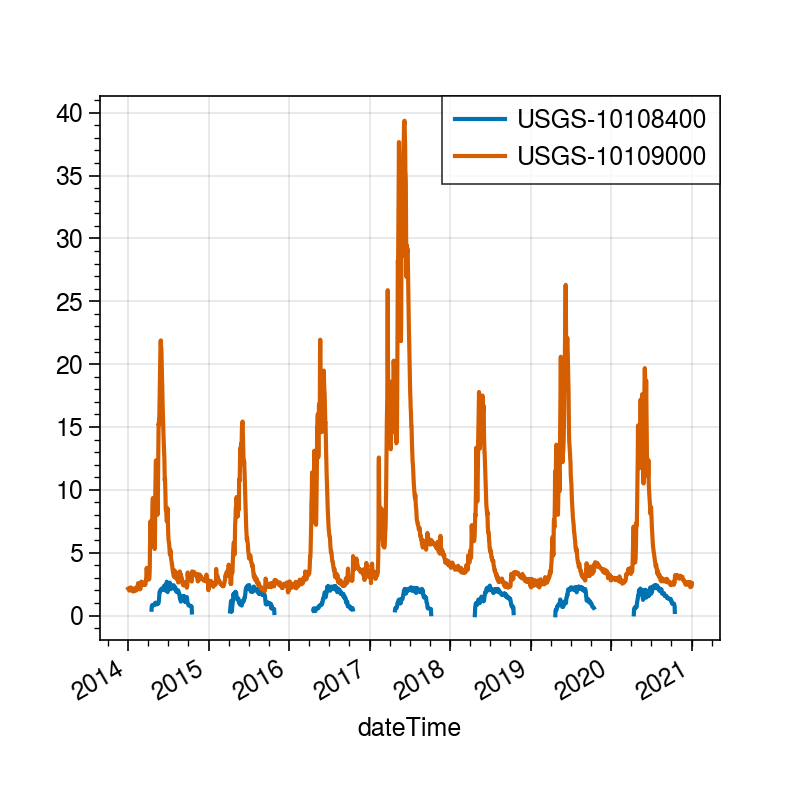

In [8]:
df.plot()

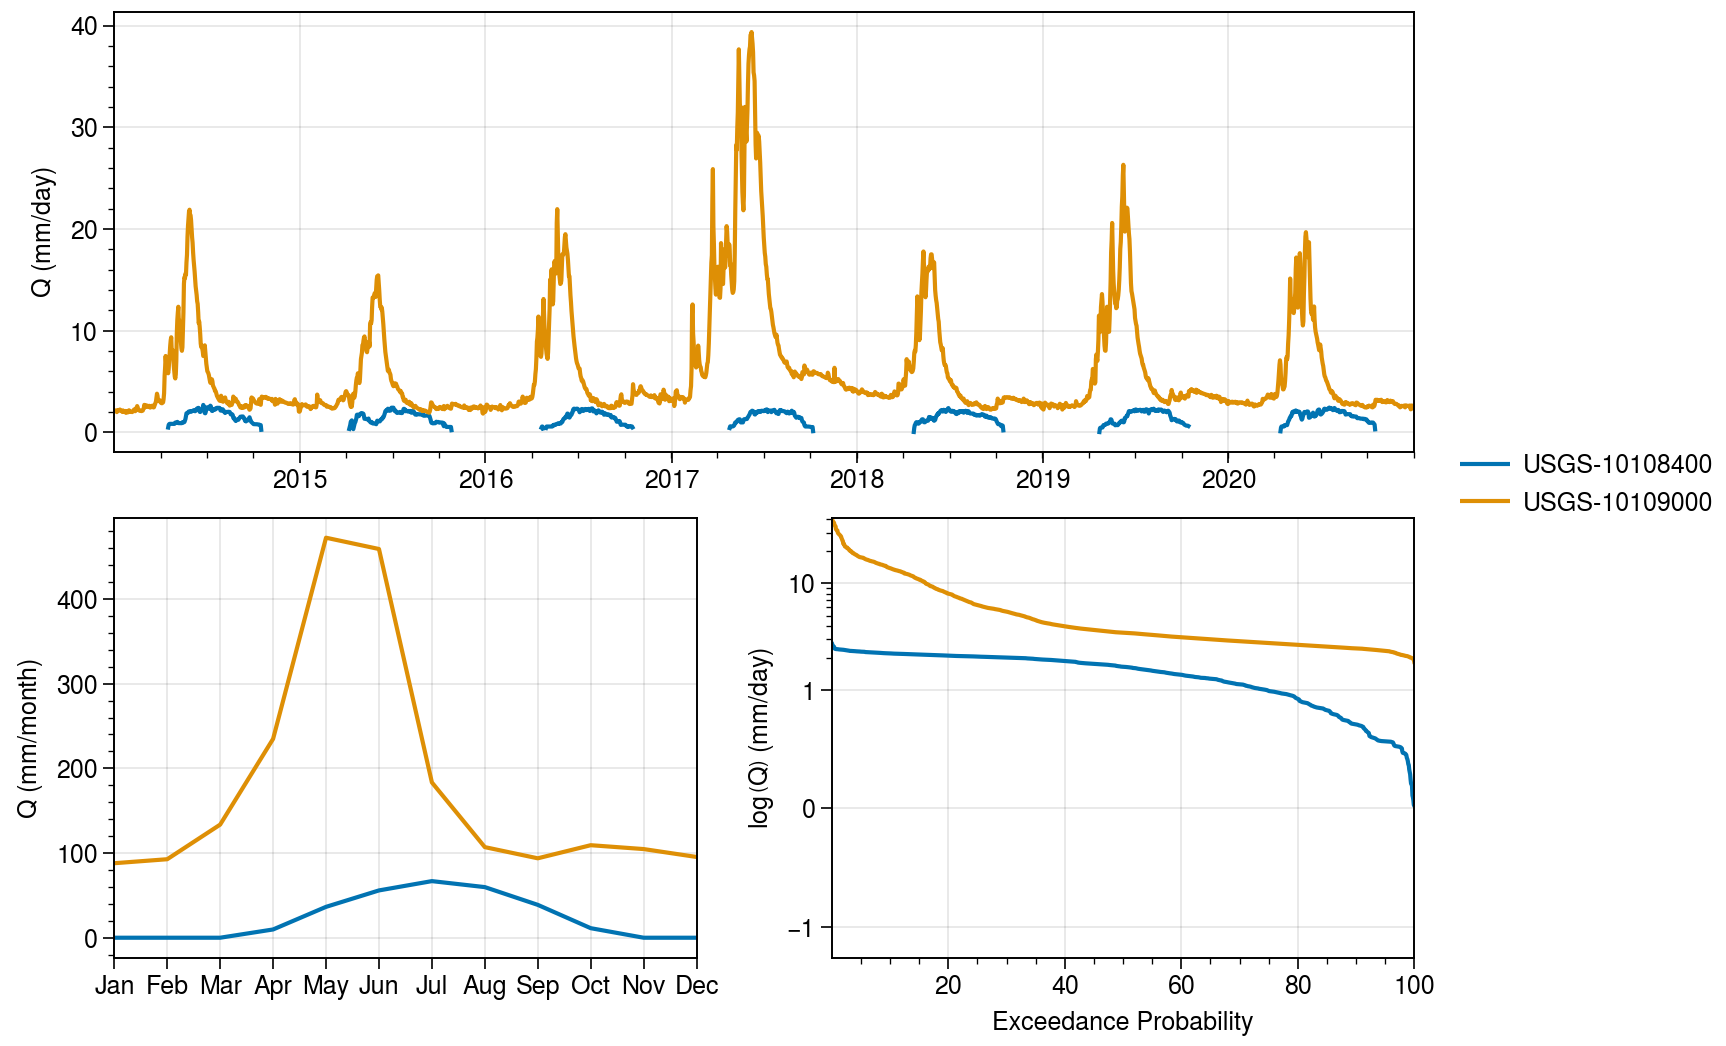

In [9]:
plot.signatures(df)